In [3]:
import pandas as pd
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [21]:
left_df = df[df['left'] == 1]
not_left_df = df[df['left'] == 0]

In [28]:
def avgs(column):
    # Calculate the average satisfaction for cases when employees left
    val_left = left_df[column].mean()
    
    # Calculate the average satisfaction for cases when employees left
    val_not_left = not_left_df[column].mean()
    
    return (val_left, val_not_left)

In [29]:
print(avgs('satisfaction_level'))

(0.4400980117614114, 0.666809590479524)


In [30]:
print(avgs('last_evaluation'))

(0.7181125735088211, 0.7154733986699335)


In [34]:
print(avgs('number_project'))

(3.8555026603192384, 3.786664333216661)


In [35]:
print(avgs('time_spend_company'))

(3.876505180621675, 3.3800315015750786)


In [36]:
print(avgs('Work_accident'))

(0.047325679081489776, 0.17500875043752187)


In [37]:
print(avgs('promotion_last_5years'))

(0.005320638476617194, 0.026251312565628283)


In [ ]:
# Among continuous variables, satisfaction_level, Work_accident, promotion_last_5years

<Axes: xlabel='salary'>

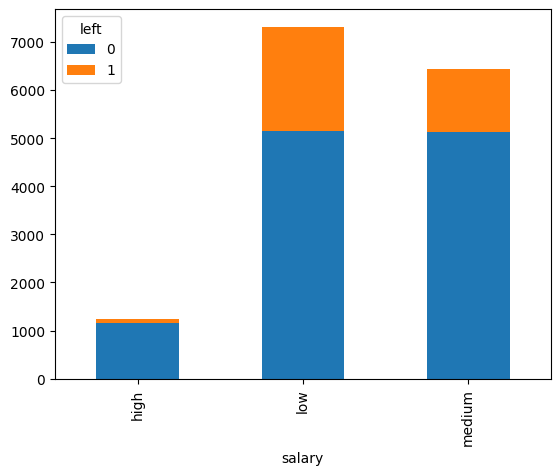

In [38]:
grouped = df.groupby(['salary', 'left']).size().unstack(fill_value=0)

# Plot bar graph
grouped.plot(kind='bar', stacked=True)

<Axes: xlabel='Department'>

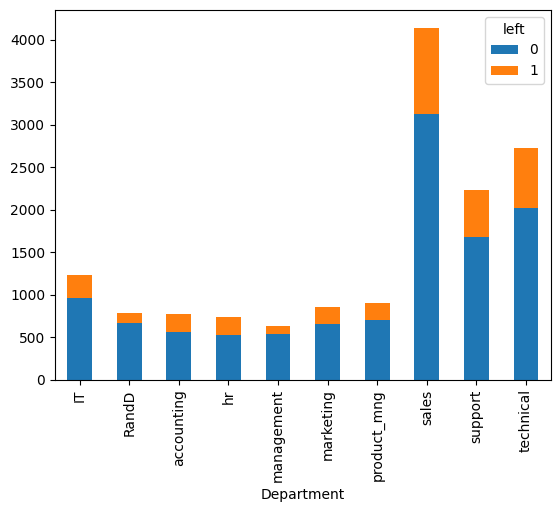

In [39]:
grouped = df.groupby(['Department', 'left']).size().unstack(fill_value=0)

# Plot bar graph
grouped.plot(kind='bar', stacked=True)

In [41]:
one_hot_encoded = pd.get_dummies(df['salary'], drop_first=True)
one_hot_encoded = one_hot_encoded.astype(int)
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
df_encoded.drop(columns=['salary', 'Department', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'], inplace=True)
df_encoded

,satisfaction_level,Work_accident,left,promotion_last_5years,low,medium
0,0.38,0,1,0,1,0
1,0.80,0,1,0,0,1
2,0.11,0,1,0,0,1
3,0.72,0,1,0,1,0
4,0.37,0,1,0,1,0
...,...,...,...,...,...,...
14994,0.40,0,1,0,1,0
14995,0.37,0,1,0,1,0
14996,0.37,0,1,0,1,0
14997,0.11,0,1,0,1,0


In [48]:
X_values = df_encoded.drop(columns = ['left'])
Y_values = df['left']

In [49]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X_values, Y_values, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [52]:
model.score(X_test, y_test)

0.7736666666666666